In [2]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

pj_sell = pd.read_csv('transporte/Trans_PJ_Venda.csv')
pn_sell = pd.read_csv('transporte/Trans_PN_Venda.csv')
pj_buy = pd.read_csv('transporte/Trans_PJ_Compra.csv')
pn_buy = pd.read_csv('transporte/Trans_PN_Compra.csv')

# Add traces
fig.add_trace(
    go.Scatter(x=pj_sell['valueUpdateDateTime'], y=pj_sell['value'], name="Value over Time (USD, SELL, PJ, Transporte)"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=pn_sell['valueUpdateDateTime'], y=pn_sell['value'], name="Value over Time (USD, SELL, PN, Transporte)"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=pj_buy['valueUpdateDateTime'], y=pj_buy['value'], name="Value over Time (USD, BUY, PJ, Transporte)"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=pn_buy['valueUpdateDateTime'], y=pn_buy['value'], name="Value over Time (USD, BUY, PN, Transporte)"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Value Over Time (USD, BUY e SELL, Transporte, PJ e PN)"
)

# Set x-axis title
fig.update_xaxes(title_text="TimeStamp")

# Set y-axes titles
fig.update_yaxes(title_text="Value", secondary_y=False)

# Update y-axes to show the full range of data
fig.update_yaxes(range=[min(pj_sell['value'].min(), pn_sell['value'].min(), pj_buy['value'].min(), pn_buy['value'].min()), max(pj_sell['value'].max(), pn_sell['value'].max(), pj_buy['value'].max(), pn_buy['value'].max())], secondary_y=False)
fig.update_yaxes(range=[min(pj_sell['value'].min(), pn_sell['value'].min(), pj_buy['value'].min(), pn_buy['value'].min()), max(pj_sell['value'].max(), pn_sell['value'].max(), pj_buy['value'].max(), pn_buy['value'].max())], secondary_y=True)

# Increase the number of y-ticks
fig.update_yaxes(tickformat=".3f", nticks=20, secondary_y=False)
fig.update_yaxes(tickformat=".3f", nticks=20, secondary_y=True)

fig.show()

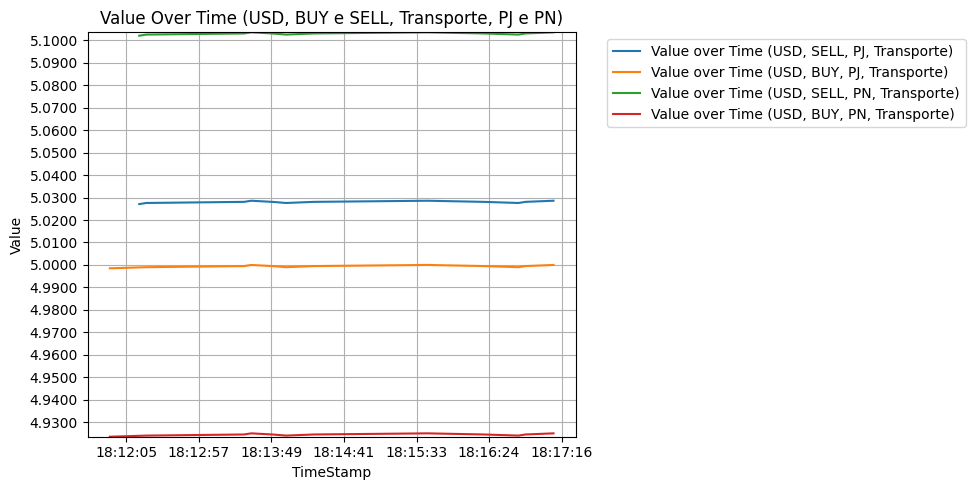

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Load the data
pj_sell = pd.read_csv('transporte/Trans_PJ_Venda.csv')
pn_sell = pd.read_csv('transporte/Trans_PN_Venda.csv')
pj_buy = pd.read_csv('transporte/Trans_PJ_Compra.csv')
pn_buy = pd.read_csv('transporte/Trans_PN_Compra.csv')

# Convert 'valueUpdateDateTime' to datetime
pj_sell['valueUpdateDateTime'] = pd.to_datetime(pj_sell['valueUpdateDateTime'])
pn_sell['valueUpdateDateTime'] = pd.to_datetime(pn_sell['valueUpdateDateTime'])
pj_buy['valueUpdateDateTime'] = pd.to_datetime(pj_buy['valueUpdateDateTime'])
pn_buy['valueUpdateDateTime'] = pd.to_datetime(pn_buy['valueUpdateDateTime'])

# Create a new figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot the data on the first y-axis
ax1.plot(pj_sell['valueUpdateDateTime'], pj_sell['value'], label="Value over Time (USD, SELL, PJ, Transporte)")
ax1.plot(pj_buy['valueUpdateDateTime'], pj_buy['value'], label="Value over Time (USD, BUY, PJ, Transporte)")
ax1.plot(pn_sell['valueUpdateDateTime'], pn_sell['value'], label="Value over Time (USD, SELL, PN, Transporte)")
ax1.plot(pn_buy['valueUpdateDateTime'], pn_buy['value'], label="Value over Time (USD, BUY, PN, Transporte)")

# Set the titles of the axes
ax1.set_xlabel('TimeStamp')
ax1.set_ylabel('Value')

# Set the title of the plot
plt.title("Value Over Time (USD, BUY e SELL, Transporte, PJ e PN)")

# Set the legend
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.05, 1))

# Increase the number of decimal places on the y-axis ticks
ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.4f'))

# Set the format of the x-axis to display the hour, minute, and second
ax1.yaxis.set_major_locator(ticker.MaxNLocator(20))
ax1.xaxis.set_major_locator(ticker.MaxNLocator(8))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Synchronize the y-axes
ax1.set_ylim([min(pj_sell['value'].min(), pn_sell['value'].min(), pj_buy['value'].min(), pn_buy['value'].min()), max(pj_sell['value'].max(), pn_sell['value'].max(), pj_buy['value'].max(), pn_buy['value'].max())])

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()
